In [1]:
import pandas as pd

import networkx as nx

In [8]:
df = pd.read_csv('dataset/final_sorted.csv')

In [9]:
df.head()

,from,to,time,utc,post.id,comment.id,parent.id
0,Professional_Feed478,Professional_Feed478,2020-12-01 02:05:52,1606784752,k4a18g,k4a18g,k4a18g
1,Sporklin,Professional_Feed478,2020-12-01 02:24:55,1606785895,k4a18g,ge7onzo,t3_k4a18g
2,shibe5,Professional_Feed478,2020-12-01 02:44:12,1606787052,k4a18g,ge7qspw,t3_k4a18g
3,HubertHamster,HubertHamster,2020-12-01 03:19:57,1606789197,k4bdlt,k4bdlt,k4bdlt
4,AutoModerator,HubertHamster,2020-12-01 03:19:58,1606789198,k4bdlt,ge7usya,t3_k4bdlt


In [53]:
binance = pd.read_csv('dataset/Binance_DOGEUSDT_1h.csv')
binance.head()

,Date,Symbol,Open,High,Low,Close,Volume DOGE,Volume USDT,tradecount
0,2023-10-19 23:00:00,DOGEUSDT,0.05865,0.05890,0.05863,0.05887,12250066.0,7.197851e+05,1872
1,2023-10-19 22:00:00,DOGEUSDT,0.05858,0.05875,0.05857,0.05865,8809389.0,5.168053e+05,1359
2,2023-10-19 21:00:00,DOGEUSDT,0.05873,0.05877,0.05855,0.05858,15152955.0,8.885734e+05,2018
3,2023-10-19 20:00:00,DOGEUSDT,0.05866,0.05899,0.05854,0.05872,27370557.0,1.607658e+06,3333
4,2023-10-19 19:00:00,DOGEUSDT,0.05852,0.05870,0.05849,0.05867,3577543.0,2.097033e+05,857


In [5]:
# number of unique users
n_users = pd.concat([df['from'], df['to']]).nunique()
print("Unique users:", n_users)

# number of posts vs comments
n_posts = (df['post.id'] == df['comment.id']).sum()
n_comments = (df['post.id'] != df['comment.id']).sum()

print("Posts:", n_posts)
print("Comments:", n_comments)

# self-posts (new threads)
self_posts = (df['from'] == df['to']).sum()
print("Thread-starting posts:", self_posts)

Unique users: 420799
Posts: 608519
Comments: 2721816
Thread-starting posts: 671692


In [8]:

# directed graph: from -> to
G = nx.DiGraph()

for _, row in df.iterrows():
    if row['from'] != row['to']:  # exclude self-posts
        if G.has_edge(row['from'], row['to']):
            G[row['from']][row['to']]['weight'] += 1
        else:
            G.add_edge(row['from'], row['to'], weight=1)

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 389931
Edges: 2306266


In [11]:

import pickle

with open("user_interaction_network.pkl", "wb") as f:
    pickle.dump(G, f)

In [2]:
import pickle

with open("user_interaction_network.pkl", "rb") as f:
    G = pickle.load(f)

In [13]:
G

In [7]:
# degree centrality
deg_cent = nx.degree_centrality(G)

# betweenness centrality (sample if graph is large)
bet_cent = nx.betweenness_centrality(G, k=100, seed=42)

# show top users
top_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]
top_bet = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top degree centrality:", top_deg)
print("Top betweenness centrality:", top_bet)

Top degree centrality: [('42points', 0.03947118713615264), ('awsomeguy1123', 0.03752981304336676), ('AutoModerator', 0.03223655527915267), ('iUsedToCallDogeDodge', 0.016667094093811712), ('DODGECOINPSU', 0.015166824814710333), ('dongnyoung1', 0.013463955068858514), ('Fulvio55', 0.013115174518503322), ('TheBeesDick', 0.012381709537609316), ('dogebrothers', 0.01210217218475111), ('Acrobatic-Maximum-36', 0.011653373682455826)]
Top betweenness centrality: [('42points', 0.025842753035473565), ('Fulvio55', 0.022983112803450258), ('AutoModerator', 0.019419918696047006), ('awsomeguy1123', 0.01661695877044361), ('FlavorFresh', 0.011556194865724862), ('Matrickpahomes54mvp', 0.010441465152471104), ('popcity_peep', 0.009254207671402876), ('DODGECOINPSU', 0.00831780718207607), ('iUsedToCallDogeDodge', 0.00796892287530327), ('Thehedgeclipper', 0.007512393200532991)]


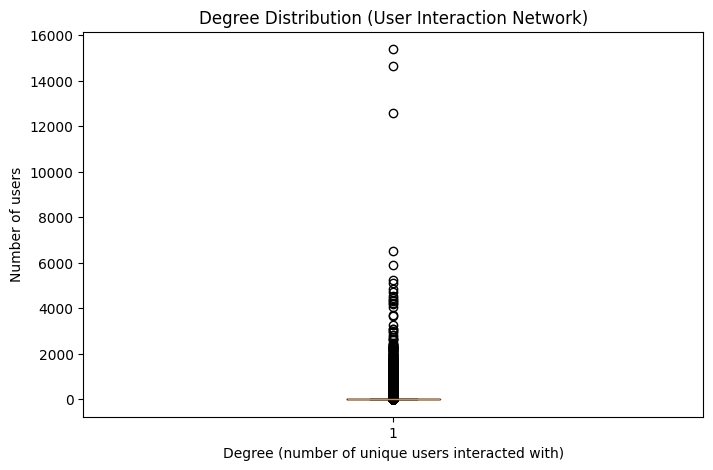

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Compute degree for all nodes (sum of in-degree + out-degree for directed networks)
degrees = [deg for node, deg in G.degree()]

# Plot histogram (linear scale)
plt.figure(figsize=(8,5))
plt.boxplot(degrees)
plt.title("Degree Distribution (User Interaction Network)")
plt.xlabel("Degree (number of unique users interacted with)")
plt.ylabel("Number of users")
plt.show()

In [9]:
import numpy as np
np.median(degrees)

np.float64(2.0)

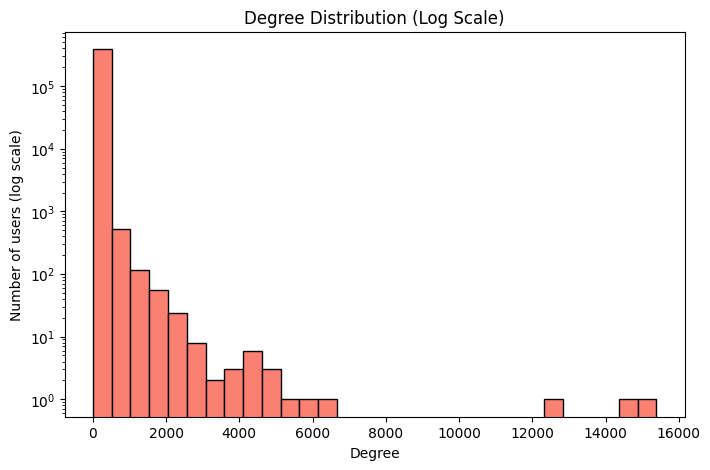

In [10]:
import numpy as np

plt.figure(figsize=(8,5))
plt.hist(degrees, bins=30, color='salmon', edgecolor='black', log=True)
plt.title("Degree Distribution (Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Number of users (log scale)")
plt.show()

In [3]:
top_degrees = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 users by degree:")
for user, deg in top_degrees:
    print(user, deg)

Top 10 users by degree:
42points 15391
awsomeguy1123 14634
AutoModerator 12570
iUsedToCallDogeDodge 6499
DODGECOINPSU 5914
dongnyoung1 5250
Fulvio55 5114
TheBeesDick 4828
dogebrothers 4719
Acrobatic-Maximum-36 4544


In [7]:
# list of moderators
mod_list = ['42points', 'Jools1802', 'GoodShibe', 'jimjunkdude', 'FloodgatesBot', 'RepostSleuthBot', 'AutoModerator']

In [10]:
df["is_moderator"] = df["from"].isin(mod_list)

In [16]:

df["to_moderator"] = df["to"].isin(mod_list)

In [13]:
df

,from,to,time,utc,post.id,comment.id,parent.id,is_moderator
0,Professional_Feed478,Professional_Feed478,2020-12-01 02:05:52,1606784752,k4a18g,k4a18g,k4a18g,False
1,Sporklin,Professional_Feed478,2020-12-01 02:24:55,1606785895,k4a18g,ge7onzo,t3_k4a18g,False
2,shibe5,Professional_Feed478,2020-12-01 02:44:12,1606787052,k4a18g,ge7qspw,t3_k4a18g,False
3,HubertHamster,HubertHamster,2020-12-01 03:19:57,1606789197,k4bdlt,k4bdlt,k4bdlt,False
4,AutoModerator,HubertHamster,2020-12-01 03:19:58,1606789198,k4bdlt,ge7usya,t3_k4bdlt,True
...,...,...,...,...,...,...,...,...
3330330,LEGACYlock,LAG4739,2021-07-31 23:57:23,1627768643,ovd5e0,h78x9gw,t3_ovd5e0,False
3330331,Nawmannah,spicytomatopasteanon,2021-07-31 23:57:32,1627768652,ov5r7s,h78xa3j,t1_h78wzcy,False
3330332,Ravengm,DistinctEngineering2,2021-07-31 23:58:09,1627768689,ov9uyj,h78xcmh,t1_h77t94e,False
3330333,Otherwise_Baby_6930,AFRO-1015,2021-07-31 23:58:44,1627768724,ov5r7s,h78xf3p,t1_h78w9fg,False


In [15]:
df[df['is_moderator'] == 1]['from'].value_counts()

from
AutoModerator      16332
42points             343
GoodShibe            185
jimjunkdude          148
RepostSleuthBot       25
Jools1802              1
Name: count, dtype: int64

In [17]:

df[df['to_moderator'] == 1]['to'].value_counts()

to
42points           43606
AutoModerator        545
GoodShibe            224
jimjunkdude          174
RepostSleuthBot        4
Name: count, dtype: int64

In [21]:
raw_posts_only = df[(df['post.id'] == df['comment.id']) & (df['post.id']== df['parent.id'])]

In [22]:
raw_posts_only[raw_posts_only['is_moderator'] == 1]

,from,to,time,utc,post.id,comment.id,parent.id,is_moderator,to_moderator
6355,GoodShibe,GoodShibe,2021-01-02 19:19:22,1609611562,kp2hvj,kp2hvj,kp2hvj,True,True
12569,GoodShibe,GoodShibe,2021-01-05 15:16:08,1609856168,kqz8c1,kqz8c1,kqz8c1,True,True
23401,GoodShibe,GoodShibe,2021-01-19 00:44:09,1611013449,l06zpp,l06zpp,l06zpp,True,True
32818,42points,42points,2021-01-28 16:39:22,1611848362,l700d9,l700d9,l700d9,True,True
41650,42points,42points,2021-01-28 22:34:55,1611869695,l79l0p,l79l0p,l79l0p,True,True
...,...,...,...,...,...,...,...,...,...
3310454,42points,42points,2021-07-27 11:01:18,1627376478,osj70y,osj70y,osj70y,True,True
3315545,42points,42points,2021-07-28 12:35:20,1627468520,ot7a7y,ot7a7y,ot7a7y,True,True
3319853,42points,42points,2021-07-29 12:38:40,1627555120,otuzpw,otuzpw,otuzpw,True,True
3324120,42points,42points,2021-07-30 13:47:07,1627645627,ouj1xs,ouj1xs,ouj1xs,True,True


In [28]:
# % of edges(posts/comments) (which involve mods)
mod_edge_share = (
    (df["is_moderator"] | df["to_moderator"]).mean()
)
all_nodes = pd.unique(pd.concat([df["from"], df["to"]]))
mod_nodes = df.loc[df["is_moderator"], "from"].unique()
# % of nodes (users) who are mods
mod_node_share = len(mod_nodes) / len(all_nodes)

float(mod_edge_share*100), mod_node_share * 100

(1.8417666691188723, 0.0014258589017559452)

 Mod activity over time
 

In [29]:
df[df["is_moderator"]].groupby("from")["utc"].agg(["min","max"])

,min,max
from,,
42points,1609623192,1627732150
AutoModerator,1606789198,1627766646
GoodShibe,1606935937,1626923354
Jools1802,1622834884,1622834884
RepostSleuthBot,1612551438,1627411159
jimjunkdude,1618267476,1627345058


In [61]:
import pandas as pd

df['date'] = pd.to_datetime(df['time'], errors='coerce')
df = df.dropna(subset=['date'])
df['day'] = df['date'].dt.normalize()

In [87]:
daily_mod_counts = df[df['is_moderator']].groupby('day')['is_moderator'].count()
daily_nonmod_counts = df[~df['is_moderator']].groupby('day')['is_moderator'].count()

# merge
daily_activity = pd.concat([daily_mod_counts, daily_nonmod_counts], axis=1)
daily_activity.columns = ['mod_activity', 'non_mod_activity']
daily_activity = daily_activity.fillna(0)

print(daily_activity.head())

            mod_activity  non_mod_activity
day                                       
2020-12-01           2.0                60
2020-12-02           1.0                90
2020-12-03          17.0                85
2020-12-04           4.0                60
2020-12-05           1.0                56


/tmp/ipykernel_2974/1203567697.py:5: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  daily_activity = pd.concat([daily_mod_counts, daily_nonmod_counts], axis=1)


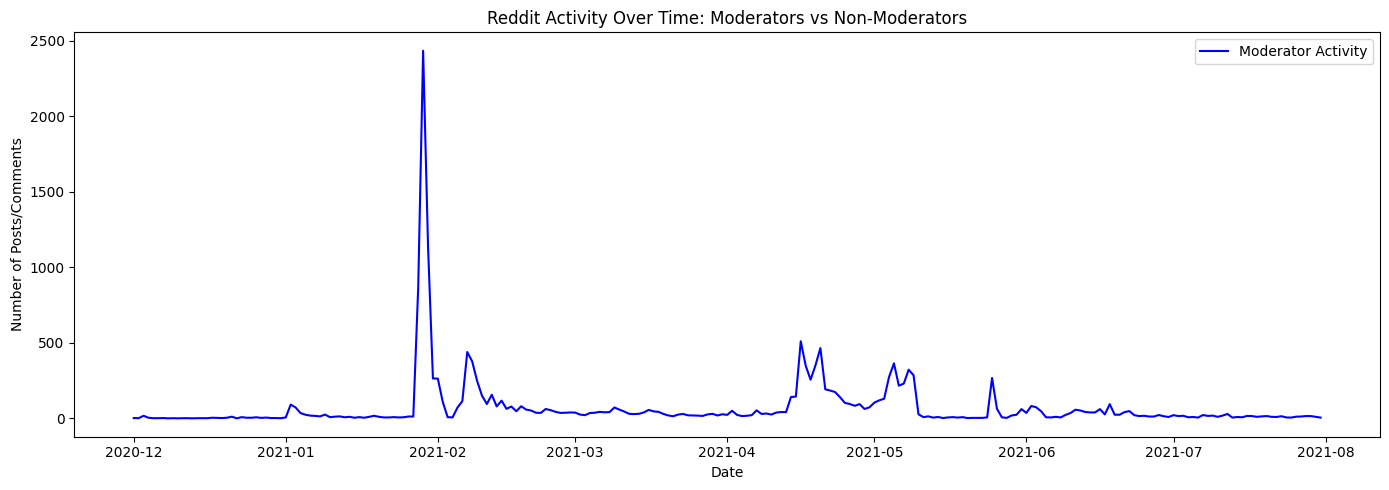

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(daily_activity.index, daily_activity['mod_activity'], label='Moderator Activity', color='blue')
plt.title('Reddit Activity Over Time: Moderators vs Non-Moderators')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.legend()
plt.tight_layout()
plt.show()

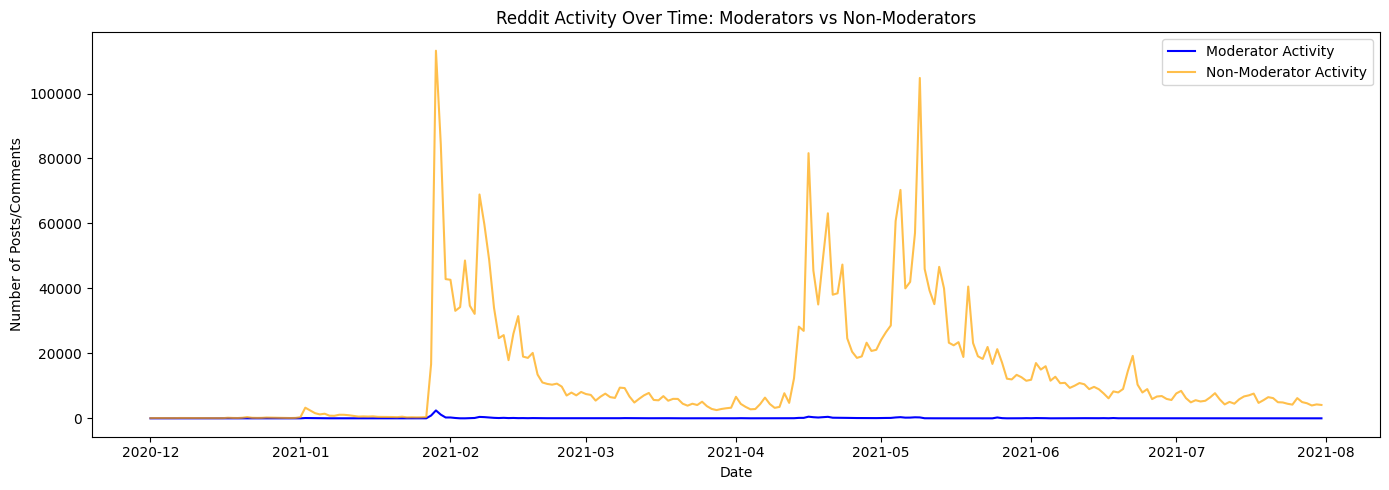

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(daily_activity.index, daily_activity['mod_activity'], label='Moderator Activity', color='blue')
plt.plot(daily_activity.index, daily_activity['non_mod_activity'], label='Non-Moderator Activity', color='orange', alpha=0.7)
plt.title('Reddit Activity Over Time: Moderators vs Non-Moderators')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.legend()
plt.tight_layout()
plt.show()

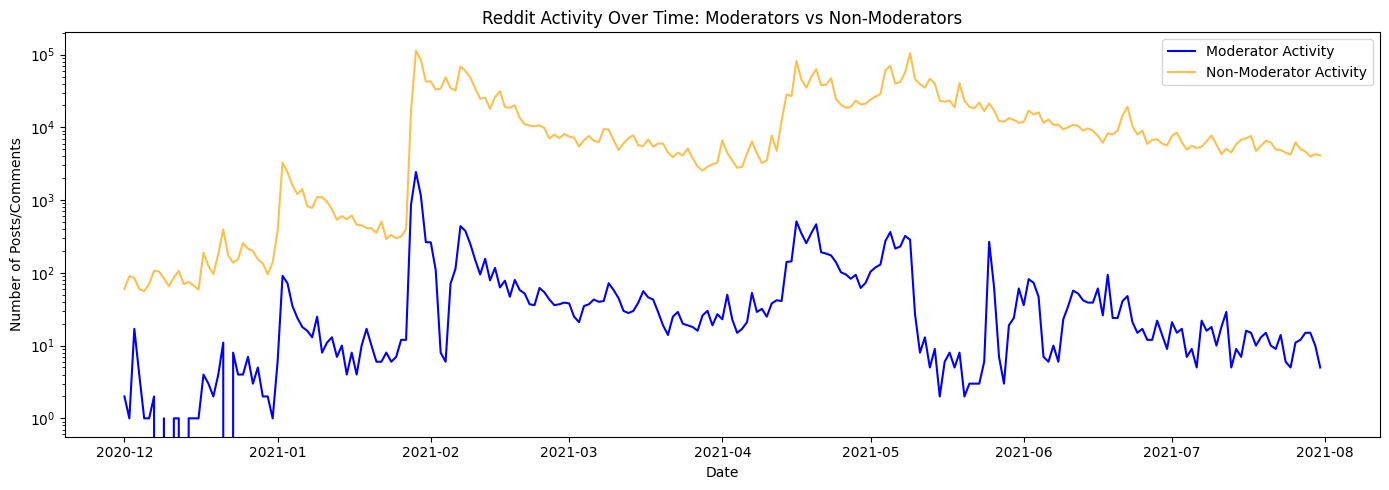

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(daily_activity.index, daily_activity['mod_activity'], label='Moderator Activity', color='blue')
plt.plot(daily_activity.index, daily_activity['non_mod_activity'], label='Non-Moderator Activity', color='orange', alpha=0.7)
plt.title('Reddit Activity Over Time: Moderators vs Non-Moderators')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.legend()
plt.yscale('log')  # <-- this sets log scale
plt.tight_layout()
plt.show()

In [92]:
daily_activity

,mod_activity,non_mod_activity
day,,
2020-12-01,2.0,60
2020-12-02,1.0,90
2020-12-03,17.0,85
2020-12-04,4.0,60
2020-12-05,1.0,56
...,...,...
2021-07-27,12.0,5006
2021-07-28,15.0,4649
2021-07-29,15.0,3961


In [100]:
daily_activity['mod_activity'].

AttributeError: 'numpy.int64' object has no attribute 'index'

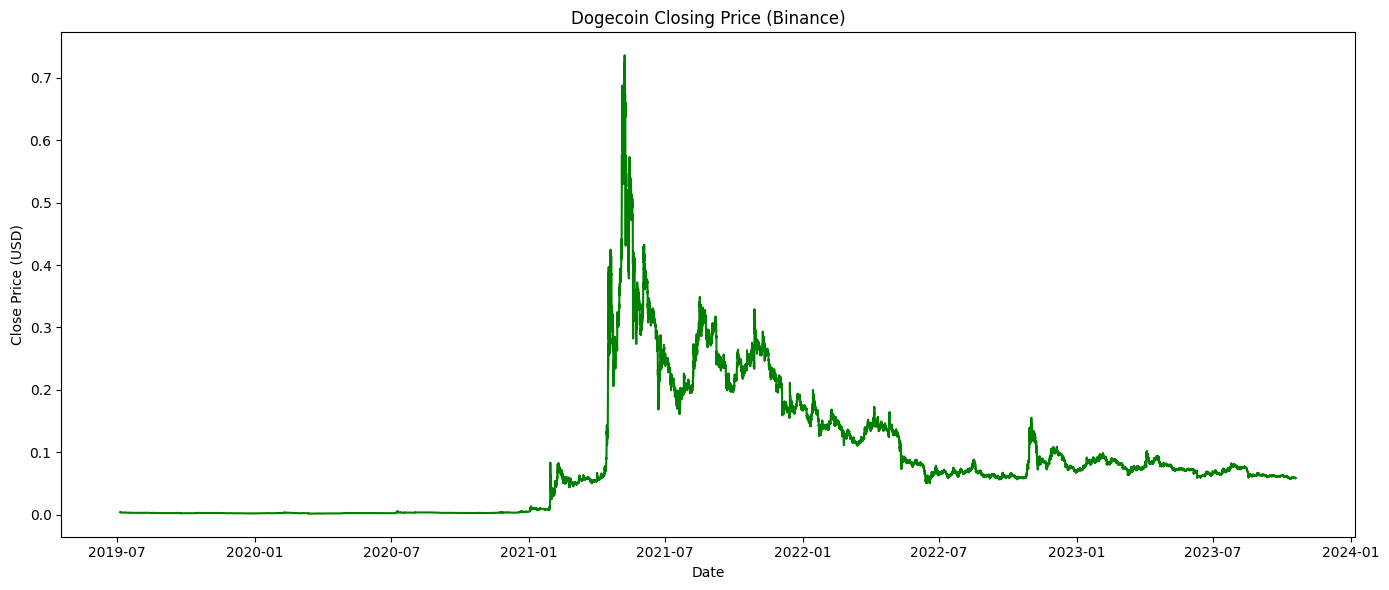

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Make sure Date is datetime
binance['Date'] = pd.to_datetime(binance['Date'], errors='coerce')
price_df = binance.dropna(subset=['Date'])  # drop bad timestamps

# 2️⃣ Sort by date (important)
price_df = price_df.sort_values('Date')

# 3️⃣ Plot closing price over time
plt.figure(figsize=(14,6))
plt.plot(price_df['Date'], price_df['Close'], color='green')
plt.title('Dogecoin Closing Price (Binance)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.tight_layout()
plt.show()

In [81]:
price_df

,Symbol,Open,High,Low,Close,Volume DOGE,Volume USDT,tradecount
2019-07-05 12:00:00,DOGEUSDT,0.004490,0.004600,0.003760,0.003925,949430724.0,3.849419e+06,6487
2019-07-06 12:00:00,DOGEUSDT,0.003632,0.003680,0.003600,0.003638,35755758.0,1.295609e+05,528
2019-07-07 12:00:00,DOGEUSDT,0.003497,0.003516,0.003470,0.003486,23946033.0,8.361605e+04,460
2019-07-08 12:00:00,DOGEUSDT,0.003540,0.003556,0.003524,0.003534,7337940.0,2.596007e+04,140
2019-07-09 12:00:00,DOGEUSDT,0.003401,0.003449,0.003399,0.003449,13478538.0,4.610732e+04,276
...,...,...,...,...,...,...,...,...
2023-10-15 12:00:00,DOGEUSDT,0.059200,0.059240,0.059100,0.059150,8872193.0,5.249731e+05,1378
2023-10-16 12:00:00,DOGEUSDT,0.059850,0.060190,0.059800,0.060170,14763287.0,8.855590e+05,1748
2023-10-17 12:00:00,DOGEUSDT,0.059880,0.059940,0.059370,0.059470,26999590.0,1.611216e+06,4477
2023-10-18 12:00:00,DOGEUSDT,0.058760,0.058810,0.058650,0.058720,9386769.0,5.513263e+05,2193


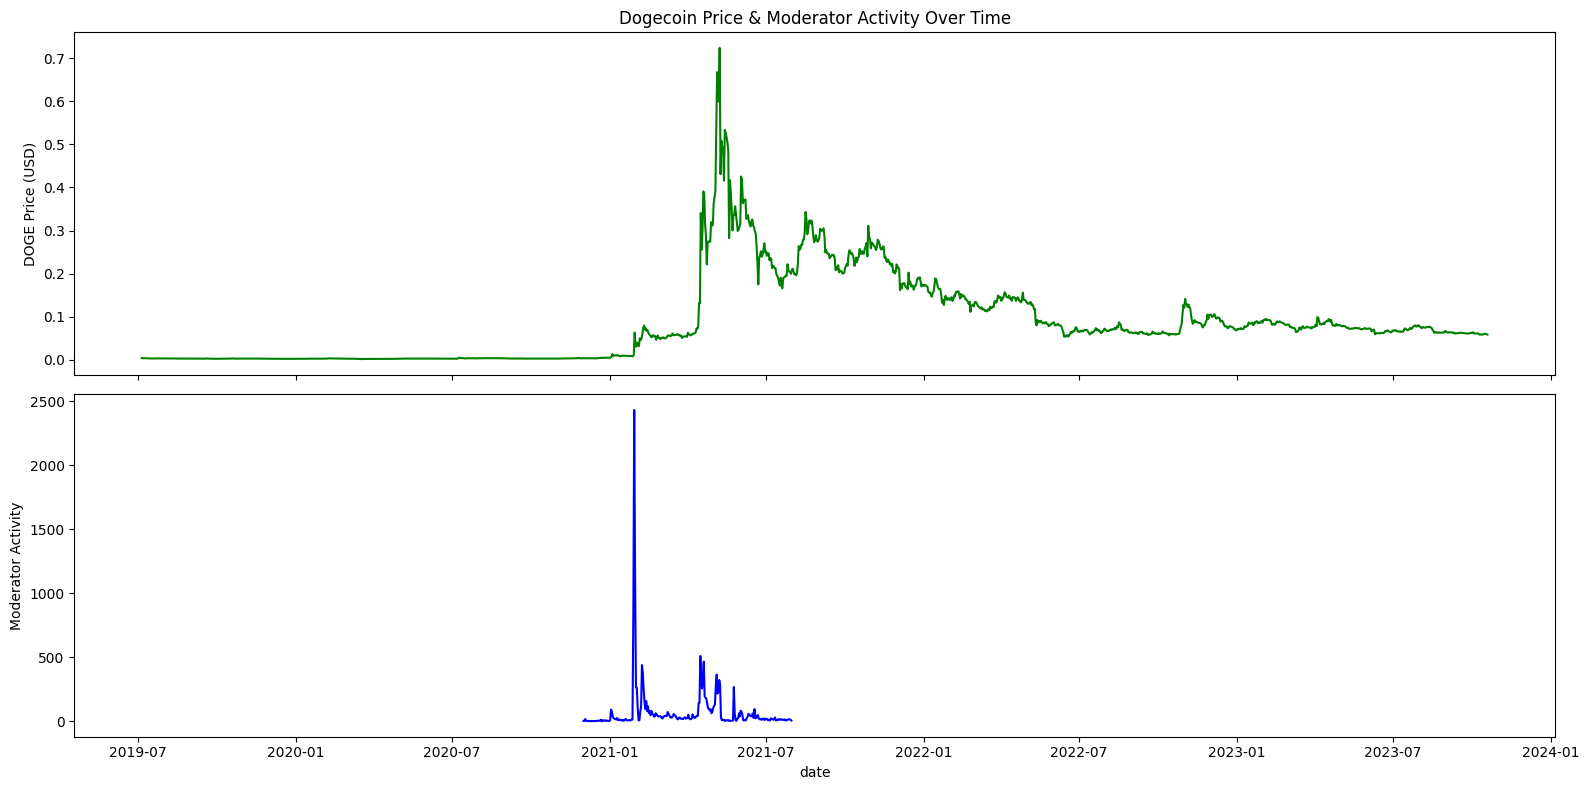

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Optional: reindex to full date range
all_dates = pd.date_range(start=min(price_df.index.min(), daily_mod_counts.index.min()),
                          end=max(price_df.index.max(), daily_mod_counts.index.max()))
daily_mod_counts = daily_mod_counts.reindex(all_dates, fill_value=0)

# 2 stacked subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8), sharex=True)

# Top: Dogecoin price
ax1.plot(price_df.index, price_df['Close'], color='green')
ax1.set_ylabel('DOGE Price (USD)')
ax1.set_title('Dogecoin Price & Moderator Activity Over Time')


ax2.plot(daily_activity.index, daily_activity['mod_activity'], label='Moderator Activity', color='blue')
ax2.set_ylabel('Moderator Activity')
ax2.set_xlabel('date')

plt.tight_layout()
plt.show()

In [102]:
# Get top 5 days with highest moderator activity
top_mod_days = daily_activity['mod_activity'].sort_values(ascending=False).head(5)
print(top_mod_days)

day
2021-01-29    2433.0
2021-01-30    1142.0
2021-01-28     866.0
2021-04-16     510.0
2021-04-20     465.0
Name: mod_activity, dtype: float64
